# Assignment 5 

<b>Author: Ketki Savle </b>


# Overview

<b> Sentiment Analysis using Deep Learning </b>

In this assignment we will learn how to apply Deep Learning on our own data. The main goal is to understand Tensorflow for computation. What we are going to try to do here is use a neural network to correctly identify sentiment, training with this data.



# Data: 

Unlike every other time, to make this programming assignment more challenging, I have used text data for classification. The nature of the data is "Unsupervised" data and we shall classify the information using deep neural network architecture. 

<b> Web data: </b>

The data has been scrapped from web for a movie reviews. These are the brief reviews expressed in positive and negative format. We have seperated the positive reviews and negative reviews and stored them in two seperate text files for our neural network to classify. 



* Positive data: 

Consists of positive reviews of the movies.

* Negative Data: 

neg.txt consists of all negative reviews. 

* Data size: 

Both the files have approximately 5000 words. Here for the text classification we will treat all rows as "X" and all columns as "Y". 

We will use this text matrix to further create vectors and we shall describe that in further coding section. 



Lets start reading the data in our python file and we shall visualize the basics. 

In [1]:
import pandas as pd 


In [2]:
import scattertext as st
import spacy
from pprint import pprint
import pandas as pd

In [3]:
data =pd.read_csv('pos1.csv', sep='delimiter', header=None)


C:\Users\Ketki\Anaconda_new\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
data_1 =pd.read_csv('neg1.csv', sep='delimiter', header=None)

C:\Users\Ketki\Anaconda_new\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
data.iloc[0:10]

,0
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."
5,the film provides some great insight into the ...
6,offers that rare combination of entertainment ...
7,perhaps no picture ever made has more literall...
8,steers turns in a snappy screenplay that curls...
9,take care of my cat offers a refreshingly diff...


In [6]:
data_1.iloc[0:10]

,0
0,"simplistic , silly and tedious ."
1,"it's so laddish and juvenile , only teenage bo..."
2,exploitative and largely devoid of the depth o...
3,[garbus] discards the potential for pathologic...
4,a visually flashy but narratively opaque and e...
5,"the story is also as unoriginal as they come ,..."
6,about the only thing to give the movie points ...
7,not so much farcical as sour .
8,unfortunately the story and the actors are ser...
9,all the more disquieting for its relatively go...


In [7]:
nlp = spacy.load('en')



    Only loading the 'en' tokenizer.



In [8]:
from wordcloud.wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import wordcloud

In [9]:

%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt


# Text Visualization: 

Since this time we are not playing with numbers, we will display some details to get the insights of the data. In the above data.iloc command we have observed the top 10 lines from the corpus that gives us some gist of what the file is all about. 

To plot this information, we shall use the charts to see the pattern in jump. That means the rise and fall of graph indicates the words that are positive and negative in resective files. 

In [10]:
nlp = spacy.load('en')



    Only loading the 'en' tokenizer.



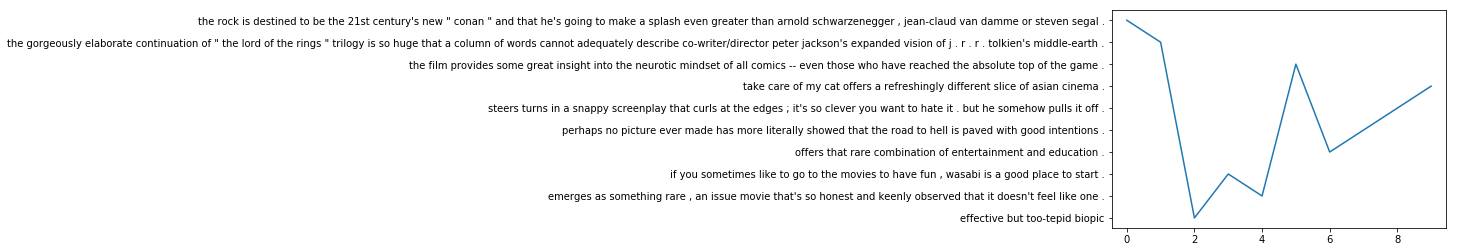

In [11]:
plt.plot(data[0:10])

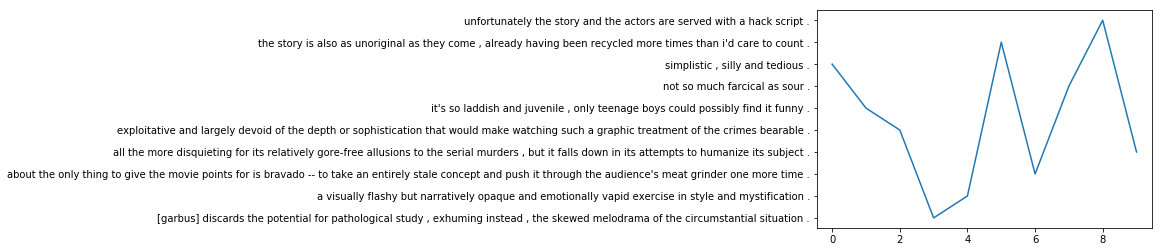

In [12]:
plt.plot(data_1[0:10])

In [13]:
from sklearn.model_selection import train_test_split
from PIL import Image
train, test = train_test_split(data,test_size = 0.1)
train_1, test_1 = train_test_split(data_1,test_size = 0.1)

In [14]:
from nltk.corpus import words

WordCloud to represent Positive words from corpus


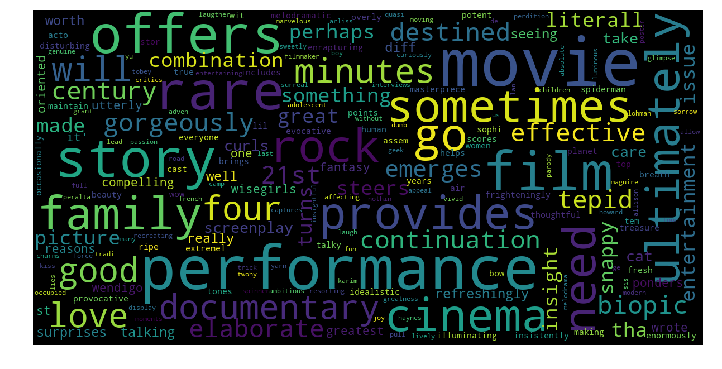

WordCloud to represent Negative words from corpus


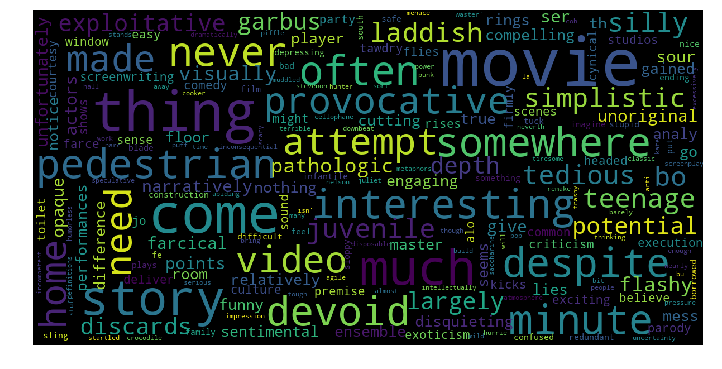

In [15]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
print("WordCloud to represent Positive words from corpus")
show_wordcloud(data)
print("WordCloud to represent Negative words from corpus")
show_wordcloud(data_1)

# Preliminary observations: 

* <b> Positive data </b>

In the very first plot of the positive data we can easily read the expressions of the author indicting that he/she is being optimistic about the movie that they have reviewd. There the author exaplains how he thinks that the movie is good. Moreover, he is sounding very opiniated about the views that he has on the given movie. 

* <b> Negative data </b>

In this file we could see that the author is being negative about the movie content and expresses how and why he disliked the contents. 
Here, we could sense the disappointment in this movie for him and he has thus expressed negative reviews. 

The WordCloud is a graphical way to display the most frequent words. Here we have plotted the wordcloud for both the files seperately. 
This way we could simply distinguish between the two file's words. 

# Preprocessing of data: 

First, our data is in language/word format, not numerical form, which we need be converted to a vector of features. Then we begin pondering about how we'll convert words to numbers, and then we make a second realization: our texts may not be the same length of words or characters. This is a big deal, since we need all featuresets to be exactly the same length going into training, and of course for training

As we need this information for deep neural network classification, the first thing is to clean the data. 

To aid us in the pre-processsing, we're going to make use of NLTK (Natural Language Toolkit). Our main interest here is for the word tokenizer, as well as the Lemmatizer. Word tokenizers separate words for us. A lemmatizer takes similar words and converts them into the same single word. The concept is very similar to stemming, only a lemma is an actual word, one you could look up in a dictionary or something like WordNet. This will help us keep our lexicon much smaller, without losing too much value.. 

There are in-build packages provided by NLP to clean the data which we shall use. However, since we want thi data to be suitable for the neural networks, we shall manually define certain features to prepare the same. 



In [16]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import random
import pickle
from collections import Counter
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
hm_lines = 100000

def create_lexicon(pos,neg):

    lexicon = []
    with open(pos,'r') as f:
        contents = f.readlines()
        for l in contents[:hm_lines]:
            all_words = word_tokenize(l)
            lexicon += list(all_words)

    with open(neg,'r') as f:
        contents = f.readlines()
        for l in contents[:hm_lines]:
            all_words = word_tokenize(l)
            lexicon += list(all_words)

    lexicon = [lemmatizer.lemmatize(i) for i in lexicon]
    w_counts = Counter(lexicon)
    l2 = []
    for w in w_counts:
        #print(w_counts[w])
        if 1000 > w_counts[w] > 50:
            l2.append(w)
    print(len(l2))
    return l2



def sample_handling(sample,lexicon,classification):

    featureset = []

    with open(sample,'r') as f:
        contents = f.readlines()
        for l in contents[:hm_lines]:
            current_words = word_tokenize(l.lower())
            current_words = [lemmatizer.lemmatize(i) for i in current_words]
            features = np.zeros(len(lexicon))
            for word in current_words:
                if word.lower() in lexicon:
                    index_value = lexicon.index(word.lower())
                    features[index_value] += 1

            features = list(features)
            featureset.append([features,classification])

    return featureset

def create_feature_sets_and_labels(pos,neg,test_size = 0.1):
    lexicon = create_lexicon(pos,neg)
    features = []
    features += sample_handling('pos.txt',lexicon,[1,0])
    features += sample_handling('neg.txt',lexicon,[0,1])
    random.shuffle(features)
    features = np.array(features)

    testing_size = int(test_size*len(features))

    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x,train_y,test_x,test_y

train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')

if __name__ == '__main__':
    train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')
    # if you want to pickle this data:
    with open('sentiment_set.pickle','wb') as f:
        pickle.dump([train_x,train_y,test_x,test_y],f)



423
423


# Explanation of the above code:

<b>1. Data cleaning- Lemmatization and Lexicon creation: </b>


* Our function takes a path to the positive file and the negative file.

* At this point, our lexicon is just a list of every word in our training data. 
 hm_lines are number of lines per file. 


* Here we have used word lemmetizer to simply eliminate the stopwords such as "is", "a", "very", "was".. and many more. 
 When we work with text, we would not want them to be counted. The simple reason behind that is high frequency occurence of these words does not contribute towards our actual goal and thus it is a good idea to get rid of these. 

* Once we get read of the stop words, we have created the function for lexicon. Here we will use the lemmatizer and divide the entire web scrapped data into positive and negative category. Here we are creating the text as python "list" . We will utilize this type of data to feed in our neural network. 

* Now we can take lexicon, and use it as our bag of words that we will look for in a string. Each time we find a lemma in our lexicon that exists in the lemmatized and word tokenized sample sentence, the index of that lemma in the lexicon is turned "on" in our previously numpy zeros array that is the same length as the lexicon.

<b>2. Feature creation: </b>
    
* Creating only clean list is not enough. We must perform feature engineering and extract the features which we require for our network. 
 At the end of the code line it thus render 423 features as an output for this function. 
 
<b>3. Create Features: </b>

* In this function we are creating labels for the feature. Now the reason behind this approach is that, for classification of this data, we want to classify this in 2 classes, positive and negative respectively. Tus there must be some engineering for the value interpretation for these two corpus. 

* We have created a class [1,0] which is for positive class and [0,1] is for negative class.  


* we begin with a numpy.zeros array that is the length of the lexicon. We then begin to iterate through the lemmatized words, adding 1 to the index value in the features array that is the same index of the word in the lexicon. From here, we apply this to our total featureset. When done, we return that whole thing. This function will be run twice; once for the positives and once for the negatives.

# Why we have chosen DNN amongst all? 


Deep Learning machines usually work better than traditional ML tools because they also learn the feature extraction part.

In image recognition,  for example, the traditional setup is to extract handcrafted features and then feed a SVM. On the contrary, deep learning schemes also optimize the features that are extracted which largely explains why they perform better.

Chances are, if you fix the features (either handcrafted or learned, but not further optimize), the winning algorithm between an deep multi-layer perceptron and a kernel SVM is depending on your skills to fine tune the hyper parameters of both methods.

In text analytics also, we have to classify the features accurately and to be able to achieve that, I have chosen DNN. 


# Parameters: 

- n_nodes_hl : nodes of the hidden layer 
- n_classes: number of classes created for classification. Here we have 2 classes, positive and negative. 
- batch size : Total number of training examples present in a single batch.
- hm_epoch: 1 epoch is when an entire dataset is passed forward and backward through the neural network only once.here we have kept the size as 10. 
- Iterations: Iterations is the number of batches needed to complete one epoch.
- hidden layers: each hidden layer that calculats the weigh and biases. 
- l1-l5 : layers that calculate matrix multiplication of input and weights and biases. 




# Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

Adam Configuration Parameters:

- alpha. Also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training
- beta1. The exponential decay rate for the first moment estimates (e.g. 0.9).
- beta2. The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a - sparse gradient (e.g. NLP and computer vision problems).
- epsilon. Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).


<b> we will play with many of these in further 3 experiemnts to achieve our goal.</b>

# Implementation of Deep Neural Network: 



In [17]:

import tensorflow as tf

import numpy as np

def create_feature_sets_and_labels(pos,neg,test_size = 0.1):
    lexicon = create_lexicon(pos,neg)
    features = []
    features += sample_handling('pos.txt',lexicon,[1,0])
    features += sample_handling('neg.txt',lexicon,[0,1])
    random.shuffle(features)
    features = np.array(features)

    testing_size = int(test_size*len(features))

    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x,train_y,test_x,test_y

train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')

n_nodes_hl1 = 1000
n_nodes_hl2 = 300
n_nodes_hl3 = 500
n_nodes_hl4 = 300
n_nodes_hl5 = 1000

n_classes = 2
batch_size = 100
hm_epochs = 10

x = tf.placeholder('float',[None, len(train_x[0])])
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(train_x[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_4_layer = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_5_layer = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}


# Nothing changes
def neural_network_model(data):

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weight']), hidden_4_layer['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weight']), hidden_5_layer['bias'])
    l5 = tf.nn.relu(l5)

    output = tf.matmul(l5,output_layer['weight']) + output_layer['bias']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels = prediction,logits = y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))


train_neural_network(x)

C:\Users\Ketki\Anaconda_new\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


423
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch 1 completed out of 10 loss: -91070603316.875
Epoch 2 completed out of 10 loss: -11904494030848.0
Epoch 3 completed out of 10 loss: -296018052710400.0
Epoch 4 completed out of 10 loss: -2863772710469632.0
Epoch 5 completed out of 10 loss: -1.5693176245321728e+16
Epoch 6 completed out of 10 loss: -5.948612470321971e+16
Epoch 7 completed out of 10 loss: -1.755305896616919e+17
Epoch 8 completed out of 10 loss: -4.336794256455762e+17
Epoch 9 completed out of 10 loss: -9.399309195972444e+17
Epoch 10 completed out of 10 loss: -1.8433119337935012e+18
Accuracy: 0.50844276


# Explanation of DNN Method: 

We will begin with our function where we have created features (423) and target class ([1,0], [0,1]) that is positive and negative. 

We have 5 layers of DNN structure and 6th layer being the output layer. 

We have defined x and y using tensorflow. 
The x has parameters of None, shape of the X (number of inputs) 
y has the parameters of None and it reads the number of classes i.e. 2. 

* Input layer: 

Initially in our first network architecture we have values of layers as 1000-300-500-300-1000. The logic behind designing these values is nothing but starting with 1000 for our X input which is nothing but the list of rows here. 

* Hidden layers: 

We are using hidden layers here as the nature of our classification is non linear. For the first model we shall keep the values as 300-500-300 and then final output as 1000 again. 

# Explanation for Neural Network Model structure: 


The implementation of our train function of neural network is very simple. We have started with the predictor variable to store the train function in it. After that we have declared the cost variable which is nothing but to minimize the cost while learning using logistic regression and adam optimizer has been declared with a learning rate of 0.001. 

After we delare these parameters, for tensorflow, we shall initialize them and start running the session. 
For the iteration, we are taking hm_epoch size as 10 and shall run the while loop for our data which will optimize this algorithm. In the while loop, we are making batch of x and y train and passing it through from start to end of the data. Then we calculate the epoch loss for every hm_epoch iteration and thus we will have total 10 epoch loss with some cost value in our output. 

We shall then calculate the accuracy using tensor equal function against target and predictor along with the cost and print the same. 

For training our data, we simply pass x as an argument through the definition and we can see the output. 

# Reason for this structure: 



This architecture has given 50% accuracy and it does converge pretty fast. At this point of time instead of simple fast forward, these parameters have been chosen primarily to see the convergence speed. 

Every hidden layer has previous node to get the data from, thw weights and biases. 

The hidden layer 1 will start with the node hl1 that has input X and shall take the value 1000 for input set of X.It then has its own weights and biases. 
Second layer has the node hl2 along with its own weights and biases. This process is repeated until HL4 and then we will calculate the output layer. 

Only hidden layers are not enough here, we have to use the value of these hidden layers to derive the classified output. Thus, we are using the declaration of layers l1 to l5 in the latter part of the code. Here we are implimenting the matrix multiplication using the tensorflow function matmul. The final output layer will have matrix multiplication of final l5 layer input value with weight and bias of matrix multiplication. 


<b> Optimization and Accuracy of Neural Network </b>

Here we are using softmax function of logistic regression along with Adam optimizer. 

In the loop we will initiate all variables to train the model. With the help of for-loop we will iterate through our train and test data which we will feed in the model for classification. 

 


# Plot the data: 

Now we will simply plot the values to see the connectivity structure. 

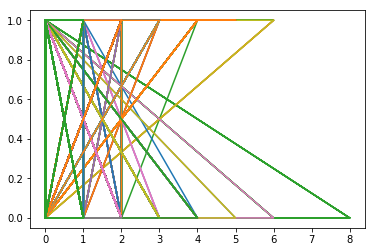

In [18]:
plt.plot(train_x, train_y)

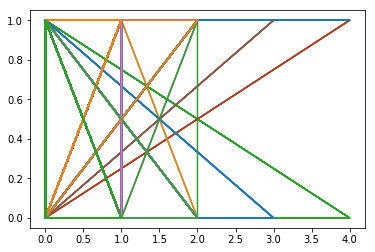

In [19]:
plt.plot(test_x, test_y)

# First experiment: 

In [20]:
def create_feature_sets_and_labels(pos,neg,test_size = 0.1):
    lexicon = create_lexicon(pos,neg)
    features = []
    features += sample_handling('pos.txt',lexicon,[1,0])
    features += sample_handling('neg.txt',lexicon,[0,1])
    random.shuffle(features)
    features = np.array(features)

    testing_size = int(test_size*len(features))

    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x,train_y,test_x,test_y

train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_nodes_hl4 = 500
n_nodes_hl5 = 500

n_classes = 2
batch_size = 128
hm_epochs = 10

x = tf.placeholder('float',[None, len(train_x[0])])
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(train_x[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_4_layer = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_5_layer = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}


# Nothing changes
def neural_network_model(data):

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weight']), hidden_4_layer['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weight']), hidden_5_layer['bias'])
    l5 = tf.nn.relu(l5)

    output = tf.matmul(l5,output_layer['weight']) + output_layer['bias']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels = prediction,logits = y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))


train_neural_network(x)

423
Epoch 1 completed out of 10 loss: -14235677925.375
Epoch 2 completed out of 10 loss: -1090118137664.0
Epoch 3 completed out of 10 loss: -26119589421056.0
Epoch 4 completed out of 10 loss: -263957200240640.0
Epoch 5 completed out of 10 loss: -1530183641202688.0
Epoch 6 completed out of 10 loss: -6132776126382080.0
Epoch 7 completed out of 10 loss: -1.902078271370035e+16
Epoch 8 completed out of 10 loss: -4.906059205653299e+16
Epoch 9 completed out of 10 loss: -1.103484839610286e+17
Epoch 10 completed out of 10 loss: -2.234849451447419e+17
Accuracy: 0.4868668


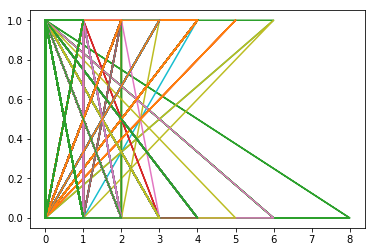

In [21]:
plt.plot(train_x,train_y)


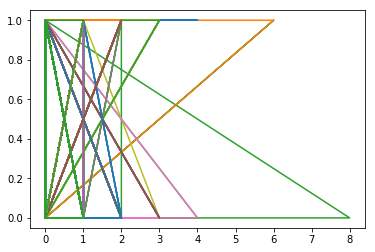

In [22]:
plt.plot(test_x,test_y)

# First experimenting with different parameters: 

In the above experiment we have kept all the layer's value same to see how the uniformity affects the performance of the neural nets. 

# Reason: 

Let us select the structure with different parameters after testing it with the same structure. We will vary it and see the accuracy and convergence rate, The ony reason for choosing this type of structure is to see what happens when we shrink and expand the layers. 

# Explanation of the code: 

The entire working structure remains the same as described at the beginning of the notebook. 

I wanted to make sure that the features are being imported correctly. Here while implementing the class, with the choice of my own parameter values, the rest of the structure for the method remains the same. All we would change is the architecture of hidden layers. 

# Second experiment: 


In [23]:
def create_feature_sets_and_labels(pos,neg,test_size = 0.1):
    lexicon = create_lexicon(pos,neg)
    features = []
    features += sample_handling('pos.txt',lexicon,[1,0])
    features += sample_handling('neg.txt',lexicon,[0,1])
    random.shuffle(features)
    features = np.array(features)

    testing_size = int(test_size*len(features))

    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x,train_y,test_x,test_y

train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')

n_nodes_hl1 = 50
n_nodes_hl2 = 200
n_nodes_hl3 = 1000
n_nodes_hl4 = 200
n_nodes_hl5 = 50

n_classes = 2
batch_size = 50
hm_epochs = 10

x = tf.placeholder('float',[None, len(train_x[0])])
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(train_x[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_4_layer = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_5_layer = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}


# Nothing changes
def neural_network_model(data):

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weight']), hidden_4_layer['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weight']), hidden_5_layer['bias'])
    l5 = tf.nn.relu(l5)

    output = tf.matmul(l5,output_layer['weight']) + output_layer['bias']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels = prediction,logits = y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))


train_neural_network(x)

423
Epoch 1 completed out of 10 loss: -28200990470.539062
Epoch 2 completed out of 10 loss: -6906102545536.0
Epoch 3 completed out of 10 loss: -168152475615232.0
Epoch 4 completed out of 10 loss: -1378609486888960.0
Epoch 5 completed out of 10 loss: -6332609048084480.0
Epoch 6 completed out of 10 loss: -2.0598763097686016e+16
Epoch 7 completed out of 10 loss: -5.349213934610022e+16
Epoch 8 completed out of 10 loss: -1.1869579289768755e+17
Epoch 9 completed out of 10 loss: -2.346582002242683e+17
Epoch 10 completed out of 10 loss: -4.248207138792407e+17
Accuracy: 0.5056285


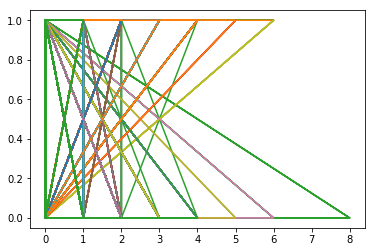

In [24]:
plt.plot(train_x,train_y)

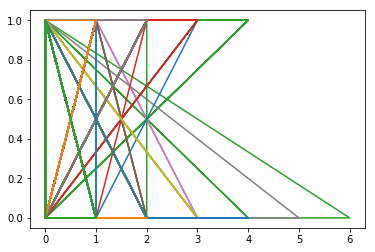

In [25]:
plt.plot(test_x,test_y)



# Reason: 

Increasing the values of the parameters significantly so that the speed of convergence could be observed well. 

Also by giving the significant values in thousands, I was curious to see how this data can perform well.


# Explanation of codes: 

The entire structure of the code remains the same. We shall plot our data points at the end of the experiment to see how it is classified by neurons. The only change here is the change in parameters to see the difference in performance if any.

# Third experiment: 

In [26]:
def create_feature_sets_and_labels(pos,neg,test_size = 0.1):
    lexicon = create_lexicon(pos,neg)
    features = []
    features += sample_handling('pos.txt',lexicon,[1,0])
    features += sample_handling('neg.txt',lexicon,[0,1])
    random.shuffle(features)
    features = np.array(features)

    testing_size = int(test_size*len(features))

    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x,train_y,test_x,test_y

train_x,train_y,test_x,test_y = create_feature_sets_and_labels('pos.txt','neg.txt')

n_nodes_hl1 = 1550
n_nodes_hl2 = 2000
n_nodes_hl3 = 1000
n_nodes_hl4 = 2000
n_nodes_hl5 = 1550

n_classes = 2
batch_size = 50
hm_epochs = 10

x = tf.placeholder('float',[None, len(train_x[0])])
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(train_x[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_4_layer = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_5_layer = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}


# Nothing changes
def neural_network_model(data):

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weight']), hidden_4_layer['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weight']), hidden_5_layer['bias'])
    l5 = tf.nn.relu(l5)

    output = tf.matmul(l5,output_layer['weight']) + output_layer['bias']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels = prediction,logits = y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))


train_neural_network(x)

423
Epoch 1 completed out of 10 loss: -2667723671322826.0
Epoch 2 completed out of 10 loss: -6.73015749823955e+17
Epoch 3 completed out of 10 loss: -1.5525708990754324e+19
Epoch 4 completed out of 10 loss: -1.2457845337197275e+20
Epoch 5 completed out of 10 loss: -5.672507730053898e+20
Epoch 6 completed out of 10 loss: -1.8379262300720265e+21
Epoch 7 completed out of 10 loss: -4.763768837305132e+21
Epoch 8 completed out of 10 loss: -1.056014072130121e+22
Epoch 9 completed out of 10 loss: -2.086576446790344e+22
Epoch 10 completed out of 10 loss: -3.77629347516253e+22
Accuracy: 0.49812382


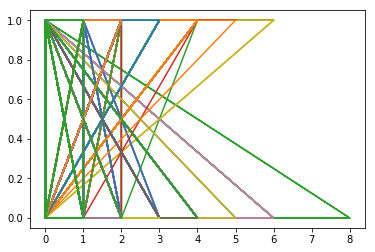

In [27]:
plt.plot(train_x,train_y)

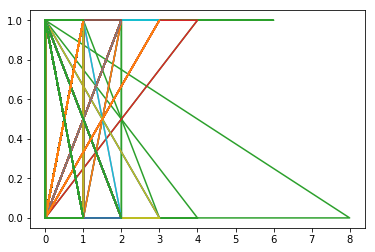

In [28]:
plt.plot(test_x,test_y)


# Reason: 

Increasing the values of the parameters significantly so that the speed of convergence could be observed well. 

Also by giving the significant values in thousands, I was curious to see how this data can perform well.


# Explanation of codes for third experiment: 

The entire structure of the code remains the same. We shall plot our data points at the end of the experiment to see how it is classified by neurons. The only change here is the change in parameters to see the difference in performance if any.

# What are all plots saying? 

Here after every experiment we have plotted the graphs to see the convergence of DNN. The train and test data has been plotted seperately to see how this works and for simpler visualization. The gridlike structure is the amalgamation of inputs , weights and layers while calculating the outputs. Our output is a binary class as declared above which will be either the information (content) is positive or negative.

# Apply in Tensorboard: 

After plotting a simple matplotlib, lets plot the structure in tensorflow to e able to make it interactive. Here we can actually click on variable and nodes to analyse the architecture of the network. 

In [29]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualization of classification of corpus using Tensorflow: 


Below is the tensor graph for our text classification. Here if we click on the nodes we will be able to examine the internal structure. 


In [30]:
show_graph(tf.get_default_graph().as_graph_def())

# Results

# Presents the results of applications of your deep networks.

<b>Model of first experiment:</b>

Parameters: 

Hidden layer 1	500<br>
Hidden layer 2	500<br>
Hidden layer 3	500<br>
Hidden layer 4	500<br>
Hidden layer 5	500<br>


Accuracy: 52%

<b>Model of second experiment:</b>

Parameters: 

Hidden layer 1	50<br>
Hidden layer 2	200<br>
Hidden layer 3	1000<br>
Hidden layer 4	200<br>
Hidden layer 5	50<br>


Accuracy: 48%

<b>Model of third experiment:</b>

Parameters: 

Hidden layer 1	1550<br>
Hidden layer 2	2000<br>
Hidden layer 3	1000<br>
Hidden layer 4	2000<br>
Hidden layer 5	1550<br>


Accuracy: 48%


Note: These values may fluctuate by couple of percents up and down if we rerun the notebook multiple times. 


# Visualize the results 

The above tensor plot and various other plots show the implementation of Neural networks. 


# Discuss about the choice of network structures and performance of it as you change the structures

The choice of network was an experiment to purely test if the uniform or non-uniform variable values would make a difference. Also I was curious to test if the higher values will make any difference in accuracy. 

# What do you think about the results?

* It can be seen that changing the parameters did not impact the accuracy much.
* Keeping all parameters same gave the best accuracy of 52% amongst all. 
* Higher values of hidden layers took some noticable amount of time to converge 
* lower values of hidden layers converged faster. 
* convergence has no impact on accuracy. 






# Conclusion:

In this assignment we have learnt how to perform sentiment analysis using deep neural network. 

The primary learning was that, every dataset has different dimensions and the algorithm works very sensitively wrt the dimensions of the input data. It is very important to get the shapes of the data correct. 

Also, tenorflow and the python style using tensorflow was different to work with as compared to other assignments. 

Here I learnt how to code for the deep neural network using tensorflow in python. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 